In [59]:
import numpy as np
import heapq
import math
from queue import Queue
import csv
import matplotlib.pyplot as plt

In [60]:
class system:
    def __init__(self, m, s,end, aRate, sRate):
        self.m = m
        self.s = s
        self.end = end
        self.aRate = aRate
        self.sRate = sRate
        self.total_cost = s * end * 10
        self.busy = 0
        self.event_list = []
        self.waiting_queue = Queue(m)
        self.machines = []
        iden = 0
        while iden < m:
            self.machines.append(machine(iden,np.random.exponential(aRate)))
            iden += 1
        iden = 0
        while iden < len(self.machines):
            item = self.machines[iden]
            heapq.heappush(self.event_list,\
                    event(item.break_time, item.break_time, item.iden, 'break'))
            iden += 1

    def simulation(self):        # One Event
        while self.oneEvent():
            pass
        # Calculate cost
        while len(self.event_list) != 0:
            e = heapq.heappop(self.event_list)
            if e.start <= self.end:
                    self.total_cost += (self.end - e.start) * 50
        while not self.waiting_queue.empty():
            m = self.waiting_queue.get()
            self.total_cost += (self.end - m.break_time) * 50
        return self.total_cost
            
    def oneEvent(self):
        e  = heapq.heappop(self.event_list)
        # if next event happens after ending
        if e.end >= self.end:
            if e.state == 'break':
                self.total_cost += (self.end - e.start) * 50
            if e.state == 'repair':
                self.total_cost += (self.end - e.start) * 50 
            return False
        
        # if one demage
        if e.state == 'break':
            break_m = self.machines[e.iden]
            break_m.break_time = e.end
            # if no  idle
            if self.busy == self.s:
                self.waiting_queue.put(break_m)
            else:
                heapq.heappush(self.event_list, event(e.end, e.end + np.random.exponential(self.sRate), break_m.iden, 'repair'))
                self.busy += 1

        # if finishes repairment
        if e.state == 'repair':
            self.busy -= 1
            self.total_cost +=  (e.end-e.start) * 50
            bt = np.random.exponential(self.aRate)
            heapq.heappush(self.event_list,event(e.end + bt, e.end + bt, e.iden, 'break'))
            
            if not self.waiting_queue.empty():
                break_m = self.waiting_queue.get()
                self.total_cost += (e.end - break_m.break_time) * 50 # total waiting
                heapq.heappush(self.event_list, event(e.end, e.end + np.random.exponential(2), break_m.iden, 'repair'))
                self.busy += 1
        return True

class machine:
    def __init__(self, iden, break_time):
        self.iden = iden
        self.break_time = break_time

class event:
    def __init__(self, start, end, iden, state):
        self.start = start
        self.end = end
        self.iden = iden
        self.state = state
    
    def __lt__(self, other):
        return self.end < other.end
    
class problem1:
    def __init__(self,n0,s,delta):
        self.s = s
        self.n0 = n0
        self.delta = delta
        self.final_result = []
        self.samples = []
        
    def algo(self):
        i = 1
        while i < self.s+1:
            y = []
            for _ in range(self.n0):
                system_ = system(5,i,800,8,2)
                y.append(system_.simulation())
            S = np.var(y,ddof=1)
            N = np.max([self.n0, math.ceil(((3.385**2)*S/(self.delta**2)))])
            for _ in range(N-self.n0):
                system_ = system(5,i,800,8,2)
                y.append(system_.simulation())
            self.samples.append(y)
            self.final_result.append(np.mean(y))
            i+=1

    def storingAndPlotting(self):
        with open('samples.csv', mode='w', newline='') as file:
            writer = csv.writer(file)
            writer.writerow(['Repairmen', 'Cost'])
            for s in range(0, 5):
                for sample in self.samples[s]:
                    writer.writerow([s+1, sample])
    
        for index in range(len(self.samples)):
            sample = self.samples[index]
            plt.hist(sample,bins=100,density=True)
            plt.xlabel("Sample Cost of %i repairmen"%(index+1))
            plt.ylabel("Frequency")
            plt.show()
        print("-------Problem1-------")
        print('The number of repairmen we should hire is: %i'%(np.argmin(self.final_result)+1))


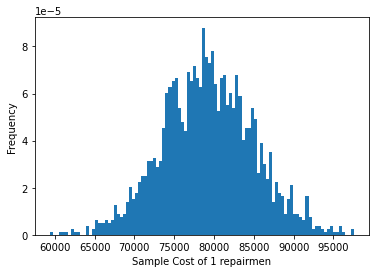

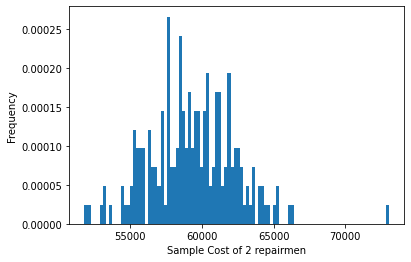

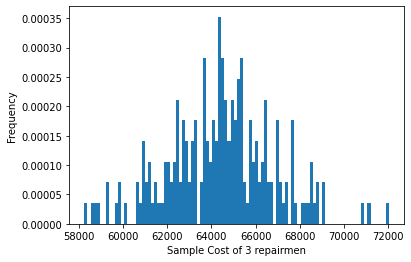

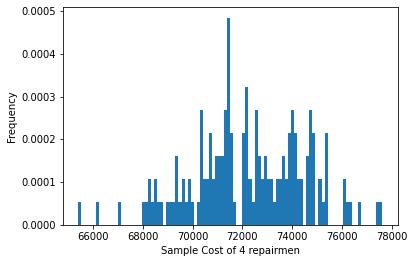

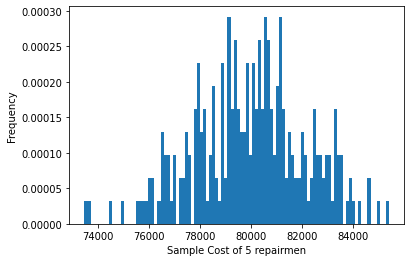

-------Problem1-------
The number of repairmen we should hire is: 2


In [61]:
# main process
algo_test = problem1(20,5,500)
algo_test.algo()
algo_test.storingAndPlotting()

In [62]:
# Problem 2
def curtail(n,temp_max,temp):
    if (temp_max - temp) > n:
        return 0
    return 1

class problem2:
    def __init__(self):
        pass
    def Rank_Cur(self,n,k):
        prob = [0.58, 0.56, 0.6, 0.65]
        result = [[],[],[],[]]
        temp = [0,0,0,0]
        state = [1,1,1,1]
        i = 0
        while i < n:
            system = 0
            while system < k:
                if state[system] == 1:
                    result[system].append(np.random.binomial(1,prob[system],1)[0])
                    temp[system] = np.sum(result[system])
                system += 1
            # curtailment checking

            system = 0
            while system < k:
                state[system] = curtail(n-i+1,np.max(temp),temp[system])
                system += 1

            # only one system is on and it's the best system    
            if np.sum(state) == 1:
                best = np.argmax(state)+1
                break
            i+=1
            
        # if still > one system
        if np.sum(state) > 1:
            best = np.argmax(temp) + 1
        self.result = result
        self.best = best
    
    def savingAndOutput(self):
        with open('q2.csv', mode='w', newline='') as file:
            writer = csv.writer(file)
            writer.writerow(['System', 'Samples'])
            for s in range(0, 4):
                for sample in self.result[s]:
                    writer.writerow([s+1, sample])

    def repeat(self):
        besystem = [0,0,0,0]
        for i in range(1000):
            self.Rank_Cur(601,4)
            b=self.best
            besystem[b-1] += 1
    
        for index in range(4):
            besystem[index] /= 1000
    
        # print the result
        print("The distribution: [%f, %f, %f, %f]"%(besystem[0],besystem[1],besystem[2],besystem[3]))
        
        if np.max(besystem) > 0.90:
            print('The correct selection rate is %f, larger than P(CS) = 0.90'%np.max(besystem))

In [63]:
# main process
mainAlgo = problem2()
mainAlgo.Rank_Cur(601, 4)
mainAlgo.savingAndOutput()
mainAlgo.repeat()

The distribution: [0.006000, 0.001000, 0.033000, 0.960000]
The correct selection rate is 0.960000, larger than P(CS) = 0.90
